In [2]:
import pandas as pd
data = pd.read_csv('/Users/liuchang/Desktop/Advertising.csv', index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

In [6]:
import seaborn as sns
%matplotlib inline

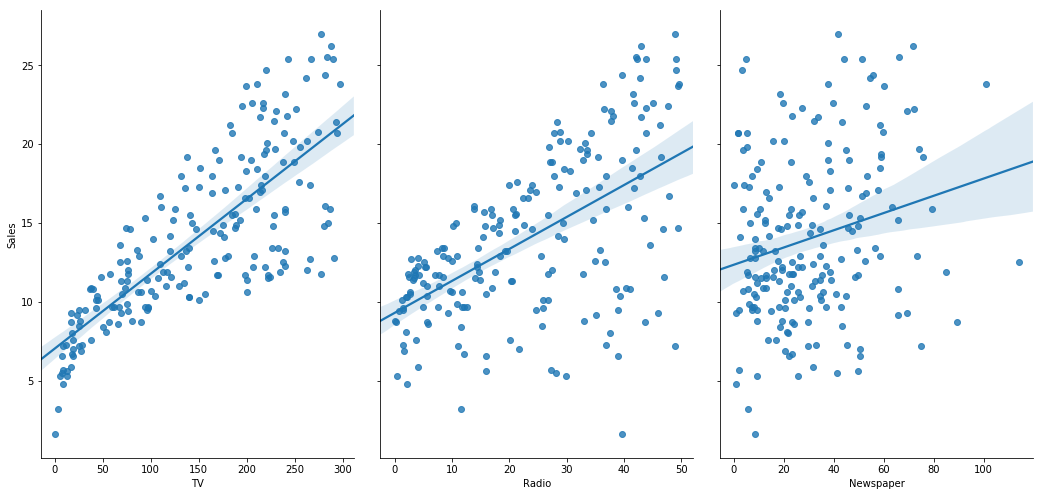

In [7]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [8]:
feature_cols = ['TV', 'Radio', 'Newspaper']

In [9]:
X = data[feature_cols]
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [11]:
y = data['Sales']

In [12]:
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [13]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [16]:
## Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [18]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [20]:
## Make predictions
y_pred = linreg.predict(X_test)

In [21]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [22]:
print((10 + 0 + 20 + 10)/4.)

10.0


In [23]:
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


In [24]:
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

150.0


In [25]:
print(metrics.mean_squared_error(true, pred))

150.0


In [26]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

12.24744871391589


In [27]:
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [29]:
## Feature selection
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


In [31]:
## Steps for K-fold cross-validation
#1.Split the dataset into K equal partitions
#2.Use fold 1 as the testing set and the union of the other folds as the training set
#3.Calculate testing accuracy.
#4.Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
#5.Use the average testing accuracy as the estimate of out-of-sample accuracy.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

print('{}{:^61}{}'.format('Iteration', 'Training set observations','Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9}{}{:^25}'.format(iteration, data[0], str(data[1])))

Iteration                  Training set observations                  Testing set observations
    1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [0 1 2 3 4]       
    2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]       [5 6 7 8 9]       
    3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]    [10 11 12 13 14]     
    4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]    [15 16 17 18 19]     
    5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]    [20 21 22 23 24]     


In [47]:
## Cross-validation: feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/Users/liuchang/Desktop/Advertising.csv', index_col=0)

# Create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [48]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [49]:
#Fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [51]:
# Convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6913531708051792
